<a href="https://colab.research.google.com/github/buke2016/buke2016/blob/buke2016-patch-3/20231127_Roadnetwork_Extraction_from_map_using_OSMnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.1 MB/s eta 0:00:00


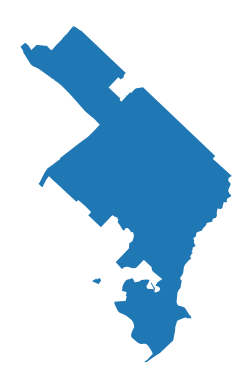

In [ ]:
import osmnx as ox
city = ox.geocode_to_gdf('loyola, California')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [ ]:
place1 = ox.geocode_to_gdf('Manhattan, California')
place2 = ox.geocode_to_gdf('disneyland,california')
place3 = ox.geocode_to_gdf('Hermosa,california')

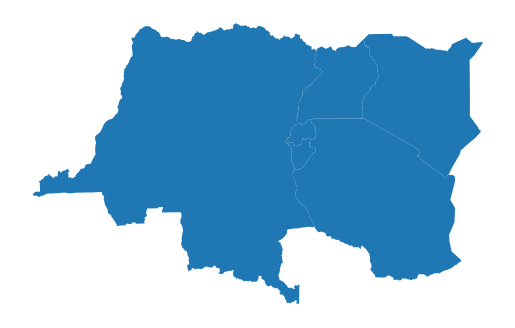

In [ ]:
places = ox.geocode_to_gdf(['Uganda','Kenya','Tanzania','Rwanda','Congo','Burundi'])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

Street network from bounding box
https://geoffboeing.com/2016/11/osmnx-python-street-networks/

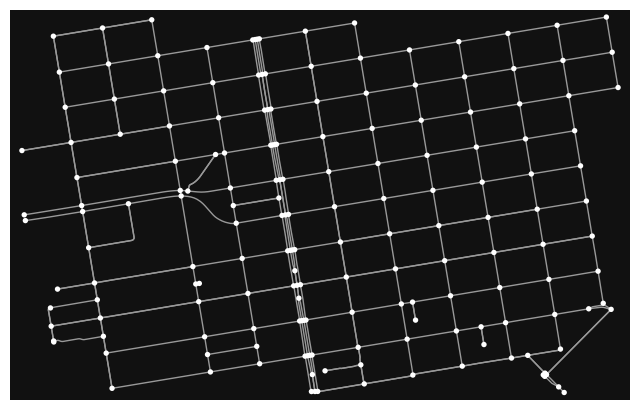

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

LMU Road Network Recognized

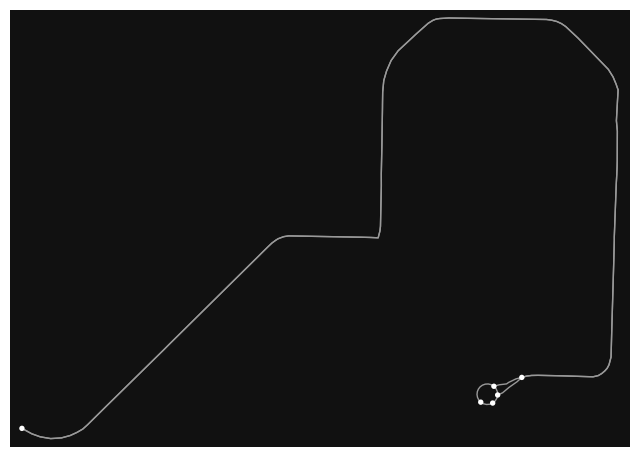

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_bbox(33.9671450982854, 33.97230580896202, -118.42309934891638, -118.41386182106918, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

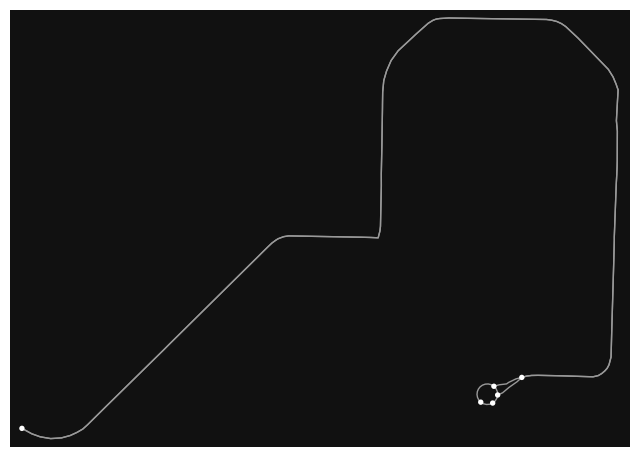

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_bbox(33.970508493544756,33.96621969636287, -118.42210156716288,-118.4139476517577, network_type="drive")
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

Manhattan Beach Recognized network

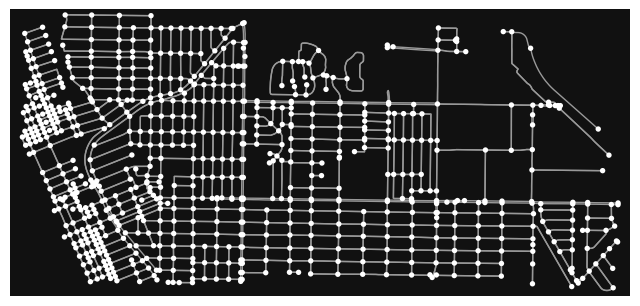

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_bbox(33.901031235868516,33.88100754207926, -118.41575072940738,-118.36217757593889, network_type="drive")
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

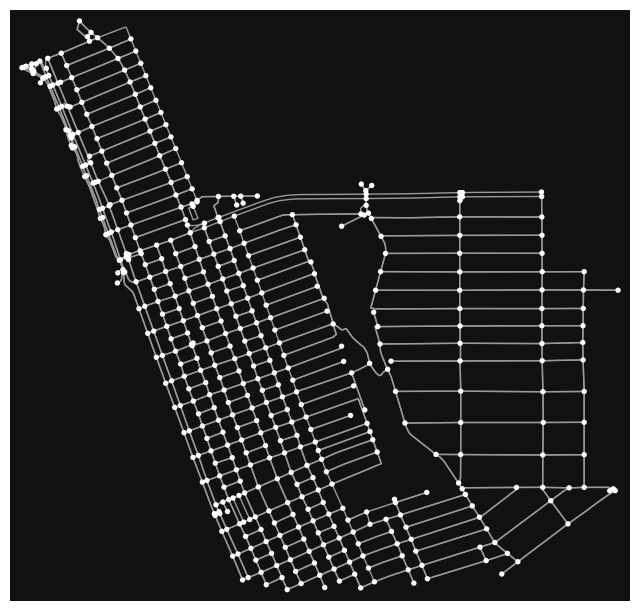

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_point((33.901031235868516, -118.41575072940738), dist=1000, network_type='all')
ox.plot_graph(G)

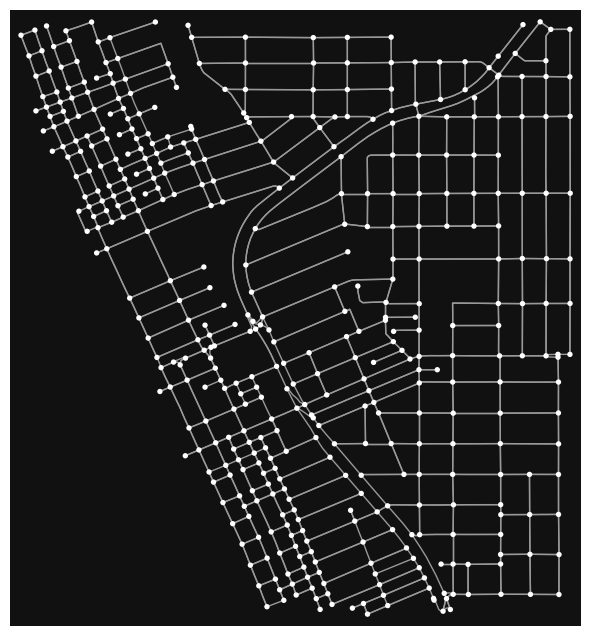

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_address('524 15th,Manhattan, California', network_type='drive')
ox.plot_graph(G)

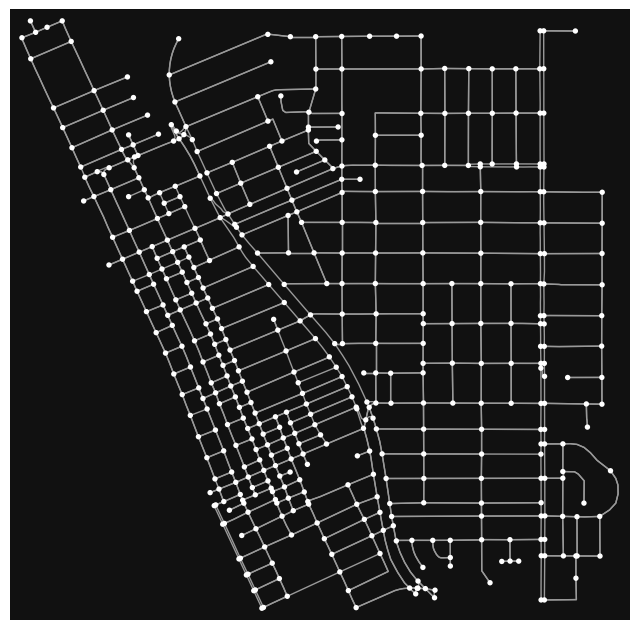

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_address('608 6th,Manhattan, California', network_type='drive')
ox.plot_graph(G)

Manhattan Beach road network from a polygon

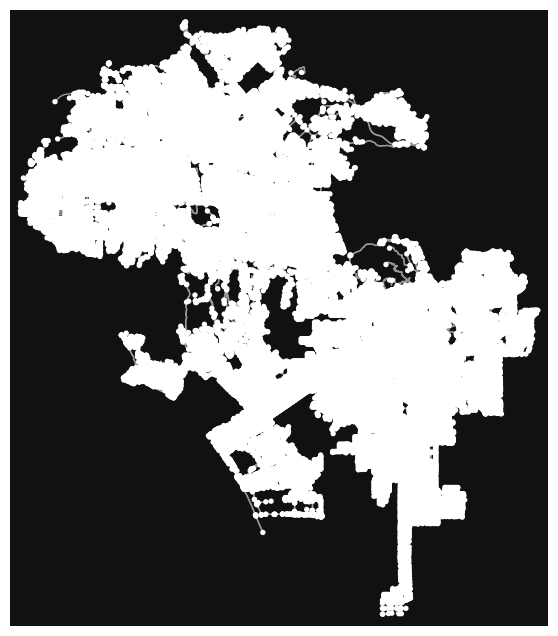

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Los Angeles,california',network_type='drive')
ox.plot_graph(G)

Error in defined plotting; Instead of bringing for Los Altos, it brought Los Angeles graph

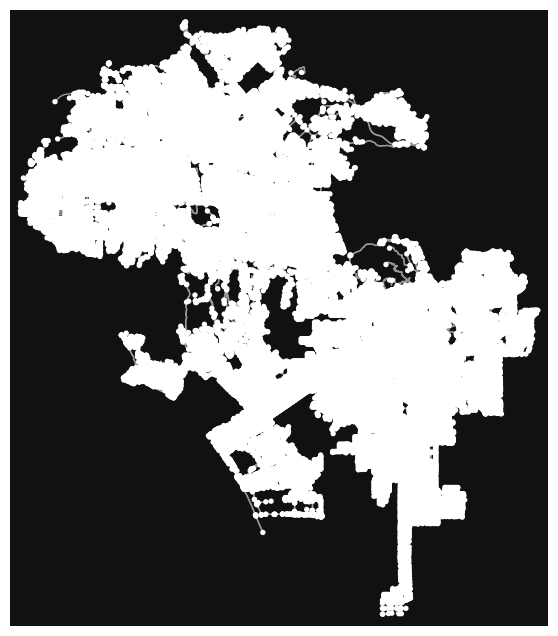

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
places = ['Los Altos, California, USA',{'city':'Los Altos Hills', 'state':'California'},'Loyola, California']
ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

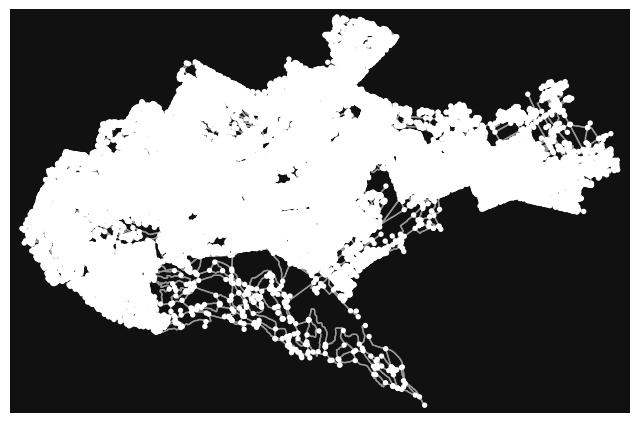

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Nairobi, Kenya')
ox.plot_graph(G)

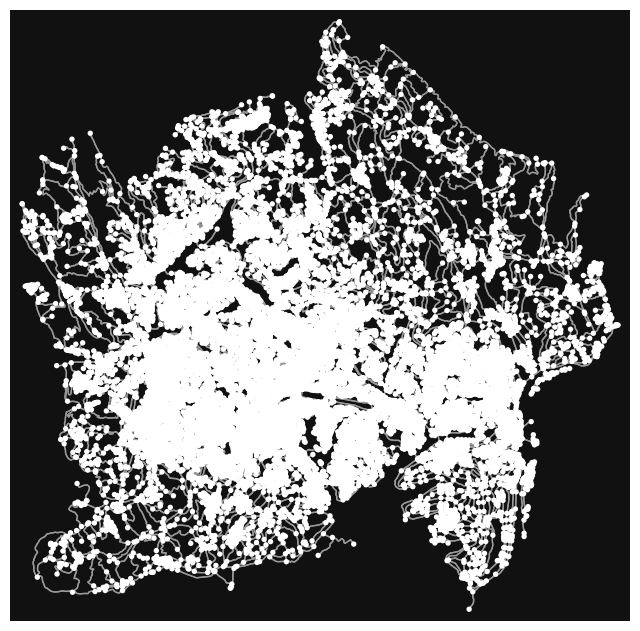

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Kigali,Rwanda')
ox.plot_graph(G)

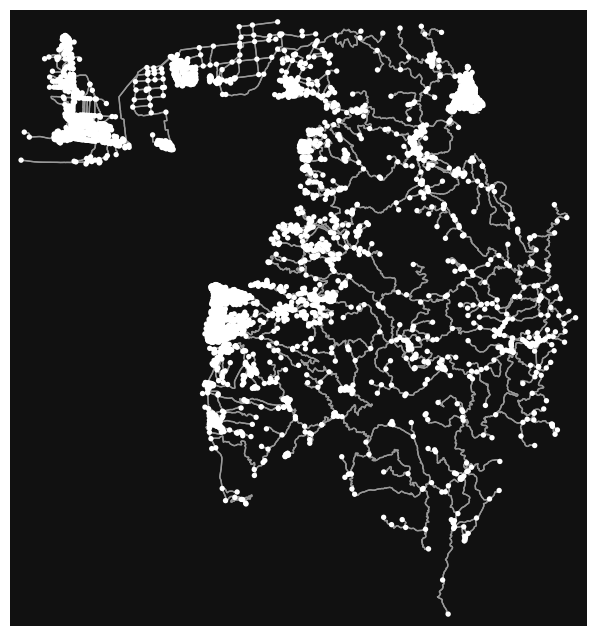

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Bujumbura, Burundi')
ox.plot_graph(G)

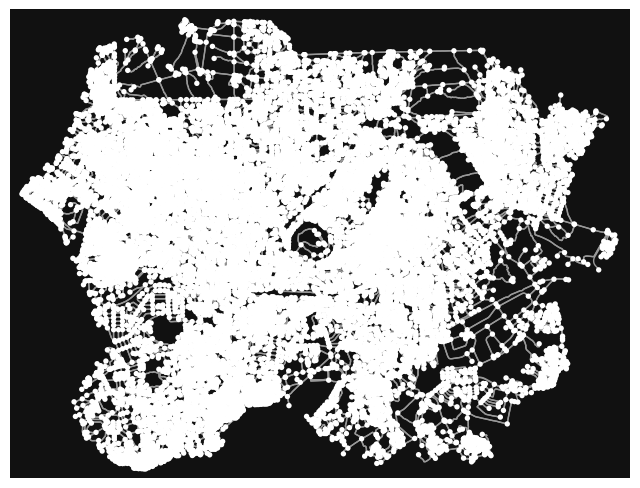

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Dodoma, Tanzania')
ox.plot_graph(G)

In [ ]:
G = ox.graph('Tripoli,Libya')
ox.plot_graph(G)

In [ ]:
G = ox.graph_from_place('Manhattan Beach, California', network_type='walk')
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])
extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

In [ ]:
G = ox.graph_from_place('Manhattan,California,USA', network_type='drive')
route = nx.shortest_path(G, orig, dest)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

Yes you can easily identify which nodes are actual intersections, vs dead-ends. OSMnx creates a graph attribute that states how many physical streets are connected to each node. Any node with >1 is an intersection. For example:

In [ ]:
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
streets_per_node = G.graph['streets_per_node']
node_ids = set(G.nodes())
intersections = [node for node, count in streets_per_node.items() if count>1]
dead_ends = [node for node, count in streets_per_node.items() if count==1]

Comment: This looks awesome. I just started playing with it and noticed your example for `ox.graph_from_bbox()` you pass a list and a network_type, however when I try that it gives me a “need at least 4” parameters error. Seems to work fine if I pass each of the bbox coordinates separately, eg like so:

In [ ]:
ox.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], network_type=’drive_service’)

OSMNX: How do I create a graph that has a union custom query?

My goal is to determine a long distance driving route from A to B, and then within a half mile radius of that driving route, determine:


1.   The road network
2.   Gas stations
Hotels


I first get the driving route as a LINESTRING.
I then create a polygon along the LINESTRING with a radius of 800 meters (half a mile).
I then use OSMNX to download and plot a graph of the road network using a custom filter that excludes pedestrian ways, cycleways, etc.

https://gis.stackexchange.com/questions/463067/osmnx-how-do-i-create-a-graph-that-has-a-union-custom-query


In [ ]:
cf_allroads = '["area"!~"yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|proposed|construction|bridleway|abandoned|platform|raceway"]'

G = ox.graph_from_polygon ( polygon = route_buffer_polygon,
                               custom_filter=cf_allroads,
                               simplify=False
                               )

How to create NetworkX graph with n nodes (OSMnx compatible) from Shapely object
https://stackoverflow.com/questions/74008354/how-to-create-networkx-graph-with-n-nodes-osmnx-compatible-from-shapely-object?rq=3

Example with a 3-neighbors graph (60 nodes, 180 edges)


In [ ]:
from shapely import geometry

# (lat, long) coordinates
p1 = geometry.Point(-96.87,32.88)
p2 = geometry.Point(-96.77,33.00)
p3 = geometry.Point(-96.67,32.95)
p4 = geometry.Point(-96.65,32.84)
pointList = [p1, p2, p3, p4, p1]

# creat geometric object
p = geometry.Polygon([[p.x, p.y] for p in pointList])

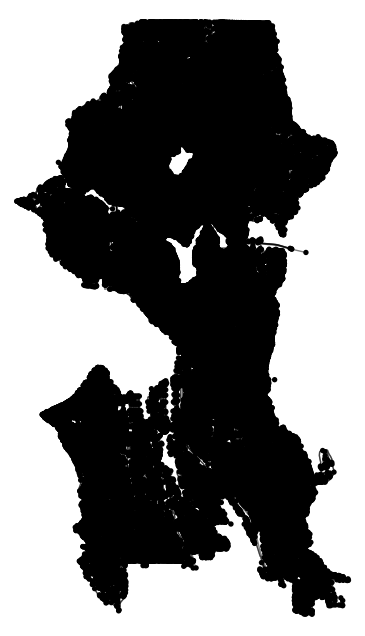

In [ ]:
ox.plot_graph(G, show=False, close=False, edge_color='black', bgcolor='w', edge_alpha=0.5, node_color='black')
ox.utils_graph.remove_isolated_nodes(G)

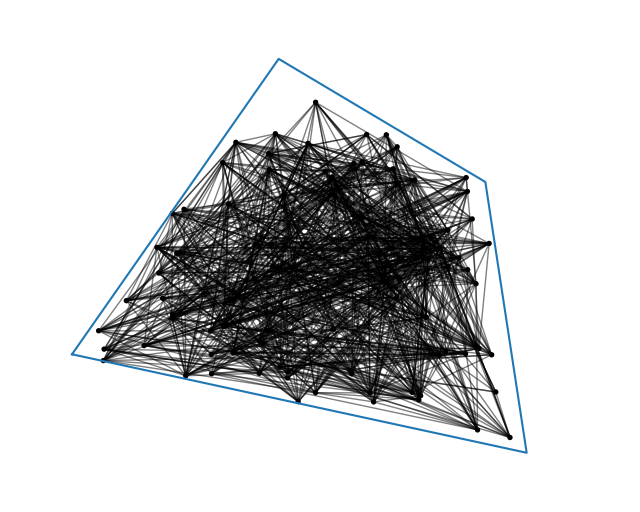

In [ ]:
x,y = p.exterior.xy
fig,ax=ox.plot_graph(I,show=False, close=False, edge_color='black', bgcolor='w', edge_alpha=0.5, node_color='black')
ox.utils_graph.remove_isolated_nodes(I)
ax.plot(x,y)
ax.set_xlim([-96.9,-96.6])
ax.set_ylim([32.82,33.02])

plt.show()

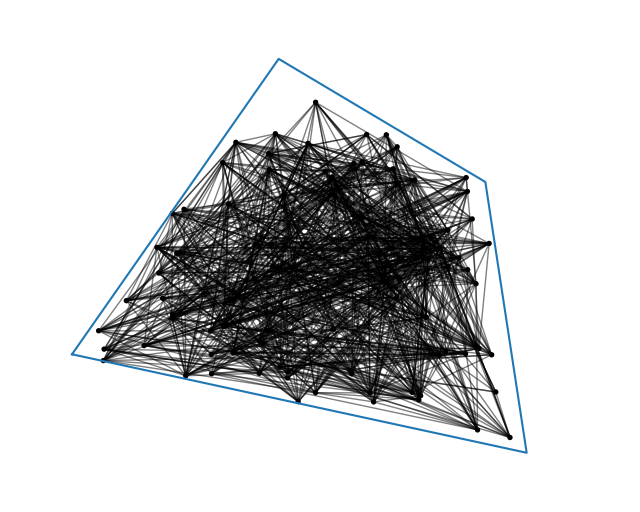

In [ ]:
from shapely import geometry
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import osmnx as ox

# (lat, long) coordinates
p1 = geometry.Point(-96.87,32.88)
p2 = geometry.Point(-96.77,33.00)
p3 = geometry.Point(-96.67,32.95)
p4 = geometry.Point(-96.65,32.84)
pointList = [p1, p2, p3, p4, p1]

# creat geometric object
p = geometry.Polygon([[p.x, p.y] for p in pointList])

H=nx.gnp_random_graph(100, 0.1, seed=None, directed=True) #step 2
I=nx.MultiDiGraph(H) #step 3

def random_point_in_shp(shp):  #step 4
    within = False
    while not within:
        x = np.random.uniform(shp.bounds[0], shp.bounds[2])
        y = np.random.uniform(shp.bounds[1], shp.bounds[3])
        within = shp.contains(Point(x, y))
    return [x,y]
pos=[random_point_in_shp(p) for _ in range(100)]

for i,node in enumerate(I.nodes(data=True)): #step 5
  node[1]['x']=pos[i][0]
  node[1]['y']=pos[i][1]

I.graph={'crs':'epsg:4326'} #step 6

x,y = p.exterior.xy #step 7
fig,ax=ox.plot_graph(I,show=False, close=False, edge_color='black', bgcolor='w', edge_alpha=0.5, node_color='black')
ox.utils_graph.remove_isolated_nodes(I)
ax.plot(x,y)
ax.set_xlim([-96.9,-96.6])
ax.set_ylim([32.82,33.02])

plt.show()